#**Implemented By Muhammad Hanan Asghar**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# !unzip '/content/drive/MyDrive/AlphaBets Classification/augmented_alphabet.zip'

In [46]:
import os
print("Number of Classes:",len(os.listdir("/content/augmented")))

Number of Classes: 25


In [51]:
from keras.applications.vgg16 import VGG16

img_rows, img_cols = 224, 224

model = VGG16(weights='imagenet',
              include_top=False,
              input_shape = (img_rows, img_cols, 3))

for layer in model.layers:
  layer.trainable = False

# view the structure of the model
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

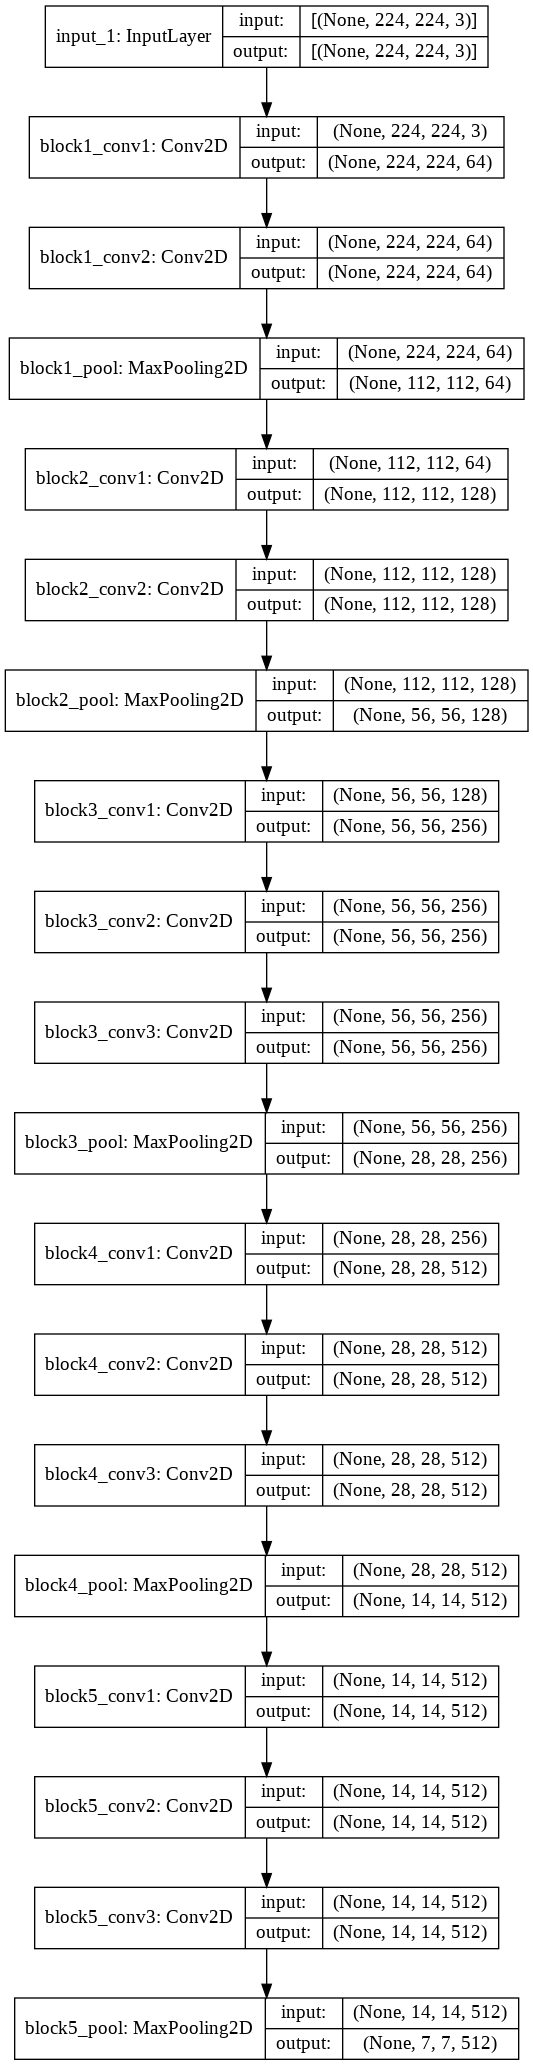

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [53]:
def layer_adder(bottom_model, num_classes):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(512, activation='relu')(top_model)
  top_model = Dense(num_classes, activation='softmax')(top_model)
  return top_model

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation, Dropout
from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D, Input
from keras.layers.normalization import BatchNormalization
from keras.models import Model


num_classes = 25

FC_Head = layer_adder(model, num_classes)
model = Model(inputs = model.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [55]:
from keras.preprocessing.image import ImageDataGenerator


dataset_gen = ImageDataGenerator(rescale = 1./255, validation_split=0.1)

train_generator = dataset_gen.flow_from_directory(
    '/content/augmented',
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',
    subset='training') 

validation_generator = dataset_gen.flow_from_directory(
    '/content/augmented',
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 10206 images belonging to 25 classes.
Found 1134 images belonging to 25 classes.


In [59]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint = ModelCheckpoint("/content/drive/MyDrive/AlphaBets Classification/alphabets_model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]


model.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

In [60]:
history = model.fit_generator(train_generator,
                              epochs = 20,
                              callbacks=callbacks,
                              validation_data=validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
319/319 [==============================] - 45s 138ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0217 - val_accuracy: 0.9921

Epoch 00001: val_loss improved from inf to 0.02167, saving model to /content/drive/MyDrive/AlphaBets Classification/alphabets_model.h5
Epoch 2/20
319/319 [==============================] - 43s 136ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0061 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.02167 to 0.00612, saving model to /content/drive/MyDrive/AlphaBets Classification/alphabets_model.h5
Epoch 3/20
319/319 [==============================] - 43s 136ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0088 - val_accuracy: 0.9974

Epoch 00003: val_loss did not improve from 0.00612
Epoch 4/20
319/319 [==============================] - 43s 135ms/step - loss: 0.0533 - accuracy: 0.9816 - val_loss: 0.0116 - val_accuracy: 0.9974

Epoch 00004: val_loss did not improve from 0.00612
Epoch 5/20
319/319 [====================

In [61]:
train_generator.class_indices

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'x': 22,
 'y': 23,
 'z': 24}

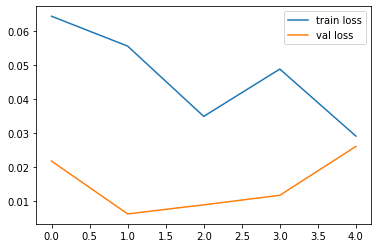

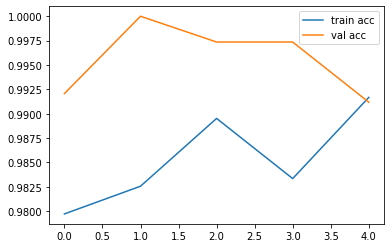

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [63]:
predictions = {}
for i,j in train_generator.class_indices.items():
  predictions[int(j)] = i

In [64]:
predictions

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'x',
 23: 'y',
 24: 'z'}

In [65]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("/content/Screenshot_2021-01-01 Alphabet Detector AI.png", target_size=(224,224))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [66]:
result

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)